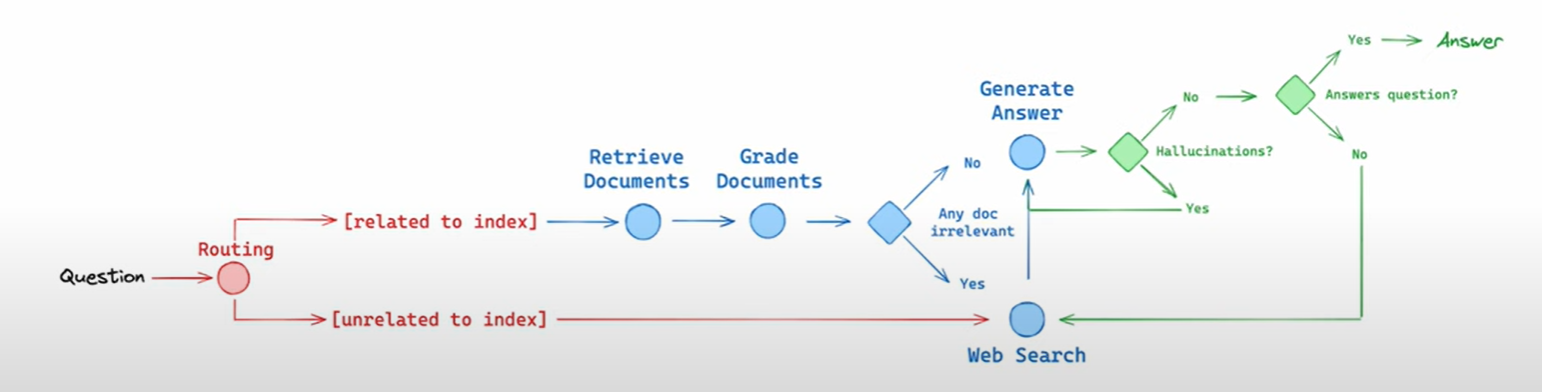

In [19]:
import os

os.environ["TOKENIZERS_PARALLELISM"] = "true"
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "RAG Agents"

### Search
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langchain_community.tools import DuckDuckGoSearchResults

wrapper = DuckDuckGoSearchAPIWrapper(max_results=3)
duck_web_search_tool = DuckDuckGoSearchResults(api_wrapper=wrapper, output_format = "list")

tavily_web_serach_tool = TavilySearchResults(k=3)

In [ ]:
from langchain_ollama import ChatOllama
local_llm = "gemma3:latest"
llm = ChatOllama(model = local_llm)
llm_json_mode = ChatOllama(model=local_llm, format="json")

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import SKLearnVectorStore
from langchain_nomic.embeddings import NomicEmbeddings

urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
]

# Load document
docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

# Split document
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size = 1000,
    chunk_overlap = 200,
)

doc_splits = text_splitter.split_documents(docs_list)

# Add to vectorDB
vectorstore = SKLearnVectorStore.from_documents(
    documents = doc_splits,
    embedding = NomicEmbeddings(model="nomic-embed-text:latest", inference_mode="local")
)

# Create retriever
retriever = vectorstore.as_retriever(k=3)

In [35]:
docs_list

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu